# 2010 Data

## Loading data

In [2]:
import pandas as pd

df_2010 = pd.read_csv('2010 household data new 1.csv')

In [3]:
df_2010.head(15)

,Town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,"179,297","87,113","92,184","146,966","71,220","75,746","12,873","6,355","6,518","14,952","7,532","7,420","4,506","2,006","2,500"
1,Cheng San,"30,503","14,883","15,620","24,815","12,064","12,751","2,437","1,221","1,216","2,539","1,291","1,248",712,307,405
2,Chong Boon,"29,903","14,671","15,232","24,613","12,043","12,570","2,005",989,"1,016","2,625","1,346","1,279",660,293,367
3,Kebun Bahru,"25,854","12,513","13,341","20,486","9,864","10,622","2,338","1,172","1,166","2,331","1,167","1,164",699,310,389
4,Sembawang Hills,"6,851","3,261","3,590","6,008","2,830","3,178",115,58,57,526,263,263,202,110,92
5,Shangri-La,"21,071","10,345","10,726","16,511","8,083","8,428","2,049","1,023","1,026","2,034","1,035",999,477,204,273
6,Sindo,"7,287","3,520","3,767","6,431","3,109","3,322",73,32,41,518,259,259,265,120,145
7,Ang Mo Kio Town Centre,"4,982","2,419","2,563","4,302","2,100","2,202",235,108,127,296,142,154,149,69,80
8,Townsville,"21,403","10,270","11,133","17,788","8,543","9,245","1,452",691,761,"1,683",823,860,480,213,267
9,Yio Chu Kang,"31,443","15,231","16,212","26,012","12,584","13,428","2,169","1,061","1,108","2,400","1,206","1,194",862,380,482


## Cleaning dataset for 2010

In [4]:
def clean(text):
    cleaned = text[9:-1]
    return cleaned 
df_2010['Town'] = df_2010['Town'].apply(clean)

In [5]:
def checkfirst(text):
    if text[0].isalpha():
        return True
    return False
town_list = []
sub_town = []
curr_town = ""
     
for i in df_2010['Town']:
    if i[0].isalpha():
        curr_town = i.strip()
        town_list.append(curr_town)
        sub_town.append(curr_town)
    else:
        town_list.append(curr_town)
        sub_town.append(i.strip())

In [6]:
df_2010['main_town'] = pd.DataFrame(town_list)
df_2010['sub_town'] = pd.DataFrame(sub_town)

In [7]:
cols = ['main_town',
       'sub_town','Town', ' Total ', ' Total Males ', 'Total Females ', ' Total Chinese',
       'Chinese Males ', 'Chinese Females ', 'Total Malays', 'Malay Males ',
       'Malay Females ', 'Total Indians', 'Indian Males ', 'Indian Females ',
       'Total Others ', 'Other Males ', 'Other Females ']
df_2010 = df_2010[cols]
df_2010.columns = ['main_town',
       'sub_town','Town', 'Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

In [8]:
df_2010 = df_2010.drop(columns='Town')

In [9]:
df_2010.head(15)

,main_town,sub_town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,Ang Mo Kio,"179,297","87,113","92,184","146,966","71,220","75,746","12,873","6,355","6,518","14,952","7,532","7,420","4,506","2,006","2,500"
1,Ang Mo Kio,Cheng San,"30,503","14,883","15,620","24,815","12,064","12,751","2,437","1,221","1,216","2,539","1,291","1,248",712,307,405
2,Ang Mo Kio,Chong Boon,"29,903","14,671","15,232","24,613","12,043","12,570","2,005",989,"1,016","2,625","1,346","1,279",660,293,367
3,Ang Mo Kio,Kebun Bahru,"25,854","12,513","13,341","20,486","9,864","10,622","2,338","1,172","1,166","2,331","1,167","1,164",699,310,389
4,Ang Mo Kio,Sembawang Hills,"6,851","3,261","3,590","6,008","2,830","3,178",115,58,57,526,263,263,202,110,92
5,Ang Mo Kio,Shangri-La,"21,071","10,345","10,726","16,511","8,083","8,428","2,049","1,023","1,026","2,034","1,035",999,477,204,273
6,Ang Mo Kio,Sindo,"7,287","3,520","3,767","6,431","3,109","3,322",73,32,41,518,259,259,265,120,145
7,Ang Mo Kio,Ang Mo Kio Town Centre,"4,982","2,419","2,563","4,302","2,100","2,202",235,108,127,296,142,154,149,69,80
8,Ang Mo Kio,Townsville,"21,403","10,270","11,133","17,788","8,543","9,245","1,452",691,761,"1,683",823,860,480,213,267
9,Ang Mo Kio,Yio Chu Kang,"31,443","15,231","16,212","26,012","12,584","13,428","2,169","1,061","1,108","2,400","1,206","1,194",862,380,482


In [10]:
import re
def clean_comma(text):
    cleaned = re.sub(',', '',text)
    return int(cleaned)
data_2010 = df_2010.replace(' - ','0')
data_2010 = data_2010.replace(" NaN ", '0')
data_2010.drop('Total', axis=1,inplace= True)

cols = ['Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']
for i in cols:  
    data_2010[i] = data_2010[i].apply(clean_comma)
    

## Grouping subtowns into their main towns

In [11]:
df_grpby_2010 = data_2010.groupby(['main_town','sub_town']).sum()

In [12]:
grpby_dict = df_grpby_2010.to_dict()

# 2015 Data

## Loading data

In [13]:
import pandas as pd

df_2015 = pd.read_csv('2015 household data new.csv')
df_2015.head()

,Town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,"174,770","84,220","90,550","143,290","68,860","74,430","13,060","6,430","6,640","14,150","7,050","7,100","4,270","1,890","2,390"
1,Ang Mo Kio Town Centre,"5,020","2,370","2,640","4,260","2,020","2,240",210,90,120,360,170,190,190,100,90
2,Cheng San,"29,770","14,400","15,370","24,660","11,890","12,770","2,140","1,080","1,060","2,380","1,210","1,170",600,230,370
3,Chong Boon,"27,900","13,590","14,310","22,910","11,150","11,760","1,950",950,"1,010","2,400","1,230","1,170",630,260,370
4,Kebun Bahru,"23,910","11,450","12,460","19,210","9,160","10,060","2,200","1,090","1,110","1,910",940,960,590,270,330


## Cleaning data

In [14]:
def clean(text):
    cleaned = text[5:]
    return cleaned 
df_2015['Town'] = df_2015['Town'].apply(clean)

In [15]:
town_list = []
sub_town = []
curr_town = ''
for i in df_2015['Town']:
    if i[0].isalpha():
        curr_town = i.strip()
        town_list.append(curr_town)
        sub_town.append(curr_town)
    else:
        town_list.append(curr_town)
        sub_town.append(i.strip())

In [16]:
# for i in range(len(town_list)):
#     if town_list[i] != None:
#         town_list[i] = town_list[i][0:-7]

In [17]:
df_2015['main_town'] = pd.DataFrame(town_list)
df_2015['sub_town'] = pd.DataFrame(sub_town)

In [18]:
cols = ['main_town',
       'sub_town','Town', ' Total ', ' Total Males ', 'Total Females ', ' Total Chinese',
       'Chinese Males ', 'Chinese Females ', 'Total Malays', 'Malay Males ',
       'Malay Females ', 'Total Indians', 'Indian Males ', 'Indian Females ',
       'Total Others ', 'Other Males ', 'Other Females ']
df_2015 = df_2015[cols]
df_2015.columns = ['main_town',
       'sub_town','Town', 'Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

In [19]:
df_2015 = df_2015.drop(columns='Town')

In [20]:
df_2015.head(15)

,main_town,sub_town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,Ang Mo Kio,"174,770","84,220","90,550","143,290","68,860","74,430","13,060","6,430","6,640","14,150","7,050","7,100","4,270","1,890","2,390"
1,Ang Mo Kio,Ang Mo Kio Town Centre,"5,020","2,370","2,640","4,260","2,020","2,240",210,90,120,360,170,190,190,100,90
2,Ang Mo Kio,Cheng San,"29,770","14,400","15,370","24,660","11,890","12,770","2,140","1,080","1,060","2,380","1,210","1,170",600,230,370
3,Ang Mo Kio,Chong Boon,"27,900","13,590","14,310","22,910","11,150","11,760","1,950",950,"1,010","2,400","1,230","1,170",630,260,370
4,Ang Mo Kio,Kebun Bahru,"23,910","11,450","12,460","19,210","9,160","10,060","2,200","1,090","1,110","1,910",940,960,590,270,330
5,Ang Mo Kio,Sembawang Hills,"6,890","3,240","3,650","6,080","2,850","3,230",100,50,50,500,230,270,220,110,110
6,Ang Mo Kio,Shangri-La,"18,510","9,090","9,410","13,900","6,810","7,090","2,410","1,200","1,210","1,790",920,880,410,170,240
7,Ang Mo Kio,Tagore,"8,350","3,990","4,360","7,440","3,540","3,900",70,40,40,560,270,290,270,140,140
8,Ang Mo Kio,Townsville,"23,770","11,300","12,470","19,630","9,320","10,310","1,660",800,860,"1,900",930,970,580,250,330
9,Ang Mo Kio,Yio Chu Kang,30,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [21]:
data_2015 = df_2015.replace(' - ','0')
data_2015 = data_2015.replace(" NaN ", '0')
data_2015.drop('Total', axis=1,inplace= True)

cols = ['Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']
for i in cols:  
    data_2015[i] = data_2015[i].apply(clean_comma)

In [22]:
data_2015.head()

,main_town,sub_town,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,Ang Mo Kio,84220,90550,143290,68860,74430,13060,6430,6640,14150,7050,7100,4270,1890,2390
1,Ang Mo Kio,Ang Mo Kio Town Centre,2370,2640,4260,2020,2240,210,90,120,360,170,190,190,100,90
2,Ang Mo Kio,Cheng San,14400,15370,24660,11890,12770,2140,1080,1060,2380,1210,1170,600,230,370
3,Ang Mo Kio,Chong Boon,13590,14310,22910,11150,11760,1950,950,1010,2400,1230,1170,630,260,370
4,Ang Mo Kio,Kebun Bahru,11450,12460,19210,9160,10060,2200,1090,1110,1910,940,960,590,270,330


### Grouping subtowns into their main towns

In [23]:
df_grpby_2015 = data_2015.groupby(['main_town','sub_town'], as_index=True).sum()

In [24]:
df_grpby_2015

Total Males  Total Females  \
main_town               sub_town                                                
Ang Mo Kio              Ang Mo Kio                       84220          90550   
                        Ang Mo Kio Town Centre            2370           2640   
                        Cheng San                        14400          15370   
                        Chong Boon                       13590          14310   
                        Kebun Bahru                      11450          12460   
                        Sembawang Hills                   3240           3650   
                        Shangri-La                        9090           9410   
                        Tagore                            3990           4360   
                        Townsville                       11300          12470   
                        Yio Chu Kang                         0              0   
                        Yio Chu Kang East                 2020           2060   
                        Yio Chu Kang North                   0              0   
                        Yio Chu Kang West                12750          13800   
Bedok                   Bayshore                          3580           3900   
                        Bedok                           141220         148530   
                        Bedok North                      41990          43940   
                        Bedok Reservoir                  12420          12980   
                        Bedok South                      25010          26180   
                        Frankel                          15920          17650   
                        Kaki Bukit                       20220          20600   
                        Kembangan                        18870          19570   
                        Siglap                            3210           3720   
Bishan                  Bishan                           44110          46590   
                        Bishan East                      13760          15060   
                        Marymount                        15650          15880   
                        Upper Thomson                    14700          15640   
Boon Lay                Boon Lay                             0              0   
                        Liu Fang                             0              0   
                        Samulun                              0              0   
                        Shipyard                             0              0   
...                                                        ...            ...   
Tuas                    Tuas Bay                             0              0   
                        Tuas North                           0              0   
                        Tuas Promenade                       0              0   
                        Tuas View                            0              0   
                        Tuas View Extension                  0              0   
Western Islands         Jurong Island and Bukom              0              0   
                        Semakau                              0              0   
                        Sudong                               0              0   
                        Western Islands                      0              0   
Western Water Catchment Western Water Catchment            800           1000   
Woodlands               Greenwood Park                       0              0   
                        Midview                          17780          17730   
                        North Coast                       7450           7160   
                        Senoko West                          0              0   
                        Woodgrove                        17960          17880   
                        Woodlands                       125900         124380   
                        Woodlands East                   47840          47660   
 

## Retrieval of only common towns

In [25]:
common_towns = ['Ang Mo Kio', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Changi', 'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West', 'Kallang', 'Mandai', 'Marine Parade', 'Newton', 'Novena', 'Outram', 'Pasir Ris', 'Punggol']
cols = ['Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

x = pd.DataFrame()
for i in range(len(df_grpby_2015)):
    if df_grpby_2015.index[i][0] in common_towns:
        x = x.append(df_grpby_2015.iloc[i])
for i in range(len(df_grpby_2010)):
    if df_grpby_2015.index[i][0] in common_towns:
        x = x.append(df_grpby_2010.iloc[i])

In [26]:
common_towns = ['Ang Mo Kio', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Changi', 'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West', 'Kallang', 'Mandai', 'Marine Parade', 'Newton', 'Novena', 'Outram', 'Pasir Ris', 'Punggol']
cols = ['Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

data_2010 = pd.DataFrame()
data_2015 = pd.DataFrame()
for i in range(len(df_grpby_2010)):
    if df_grpby_2010.index[i][0] in common_towns:
        data_2010 = data_2010.append(df_grpby_2010.iloc[i])

for i in range(len(df_grpby_2015)):
    if df_grpby_2015.index[i][0] in common_towns:
        data_2015 = data_2015.append(df_grpby_2015.iloc[i])


In [27]:
x = x.reset_index()

#### *condition here refers to the list of common subtowns between 2010 and 2015*

In [28]:
constant_sub_towns = pd.DataFrame(x['index'].value_counts() == 2).reset_index()
constant_sub_towns = constant_sub_towns[constant_sub_towns['index'] == True]
condition = constant_sub_towns['level_0'].values.tolist()

x[x['index'].isin(condition)].head()

,index,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
0,"(Ang Mo Kio, Ang Mo Kio)",74430.0,68860.0,7100.0,7050.0,6640.0,6430.0,2390.0,1890.0,143290.0,90550.0,14150.0,13060.0,84220.0,4270.0
1,"(Ang Mo Kio, Ang Mo Kio Town Centre)",2240.0,2020.0,190.0,170.0,120.0,90.0,90.0,100.0,4260.0,2640.0,360.0,210.0,2370.0,190.0
2,"(Ang Mo Kio, Cheng San)",12770.0,11890.0,1170.0,1210.0,1060.0,1080.0,370.0,230.0,24660.0,15370.0,2380.0,2140.0,14400.0,600.0
3,"(Ang Mo Kio, Chong Boon)",11760.0,11150.0,1170.0,1230.0,1010.0,950.0,370.0,260.0,22910.0,14310.0,2400.0,1950.0,13590.0,630.0
4,"(Ang Mo Kio, Kebun Bahru)",10060.0,9160.0,960.0,940.0,1110.0,1090.0,330.0,270.0,19210.0,12460.0,1910.0,2200.0,11450.0,590.0


In [29]:
data_2010 = data_2010.reset_index()
data_2015 = data_2015.reset_index()

In [30]:
data_2015_common = data_2015[data_2015['index'].isin(condition)].set_index("index")
data_2010_common = data_2010[data_2010['index'].isin(condition)].set_index("index")

### Obtaining the % difference between 2015 and 2010

In [31]:
perc_difference = (data_2015_common - data_2010_common)/data_2010_common * 100
perc_difference.head()

,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
index,,,,,,,,,,,,,,
"(Ang Mo Kio, Ang Mo Kio)",-1.737385,-3.313676,-4.312668,-6.399363,1.871740,1.180173,-4.400000,-5.782652,-2.501259,-1.772542,-5.363831,1.452653,-3.320974,-5.237461
"(Ang Mo Kio, Ang Mo Kio Town Centre)",1.725704,-3.809524,23.376623,19.718310,-5.511811,-16.666667,12.500000,44.927536,-0.976290,3.004292,21.621622,-10.638298,-2.025630,27.516779
"(Ang Mo Kio, Cheng San)",0.149008,-1.442308,-6.250000,-6.274206,-12.828947,-11.547912,-8.641975,-25.081433,-0.624622,-1.600512,-6.262308,-12.187115,-3.245313,-15.730337
"(Ang Mo Kio, Chong Boon)",-6.443914,-7.415096,-8.522283,-8.618128,-0.590551,-3.943377,0.817439,-11.262799,-6.919108,-6.053046,-8.571429,-2.743142,-7.368278,-4.545455
"(Ang Mo Kio, Kebun Bahru)",-5.290906,-7.137064,-17.525773,-19.451585,-4.802744,-6.996587,-15.167095,-12.903226,-6.228644,-6.603703,-18.060918,-5.902481,-8.495165,-15.593705


### Obtaining the absolute difference between 2015 and 2010

In [32]:
abs_difference = (data_2015_common - data_2010_common)

In [33]:
abs_difference.head()

,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
index,,,,,,,,,,,,,,
"(Ang Mo Kio, Ang Mo Kio)",-1316.0,-2360.0,-320.0,-482.0,122.0,75.0,-110.0,-116.0,-3676.0,-1634.0,-802.0,187.0,-2893.0,-236.0
"(Ang Mo Kio, Ang Mo Kio Town Centre)",38.0,-80.0,36.0,28.0,-7.0,-18.0,10.0,31.0,-42.0,77.0,64.0,-25.0,-49.0,41.0
"(Ang Mo Kio, Cheng San)",19.0,-174.0,-78.0,-81.0,-156.0,-141.0,-35.0,-77.0,-155.0,-250.0,-159.0,-297.0,-483.0,-112.0
"(Ang Mo Kio, Chong Boon)",-810.0,-893.0,-109.0,-116.0,-6.0,-39.0,3.0,-33.0,-1703.0,-922.0,-225.0,-55.0,-1081.0,-30.0
"(Ang Mo Kio, Kebun Bahru)",-562.0,-704.0,-204.0,-227.0,-56.0,-82.0,-59.0,-40.0,-1276.0,-881.0,-421.0,-138.0,-1063.0,-109.0


In [34]:
difference_df = df_grpby_2015-df_grpby_2010

In [35]:
difference_clean = difference_df.dropna()

In [36]:
difference_clean.columns
difference_clean.drop(['Total Males',"Total Females","Total Chinese", "Total Malays","Total Indians","Total Others"], axis = 1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
# difference_clean[['Chinese Males', "Chinese Females"]]

In [38]:
difference_df_perc = (df_grpby_2015-df_grpby_2010)/df_grpby_2010*100
# difference_df_perc.head()
difference_df_perc.dropna(inplace=True)
difference_df_perc.drop(['Total Males',"Total Females","Total Chinese", "Total Malays","Total Indians","Total Others"], axis = 1,inplace=True)
difference_df_perc.head()

Chinese Males  Chinese Females  \
main_town  sub_town                                                 
Ang Mo Kio Ang Mo Kio                  -3.313676        -1.737385   
           Ang Mo Kio Town Centre      -3.809524         1.725704   
           Cheng San                   -1.442308         0.149008   
           Chong Boon                  -7.415096        -6.443914   
           Kebun Bahru                 -7.137064        -5.290906   

                                   Malay Males  Malay Females  Indian Males  \
main_town  sub_town                                                           
Ang Mo Kio Ang Mo Kio                 1.180173       1.871740     -6.399363   
           Ang Mo Kio Town Centre   -16.666667      -5.511811     19.718310   
           Cheng San                -11.547912     -12.828947     -6.274206   
           Chong Boon                -3.943377      -0.590551     -8.618128   
           Kebun Bahru               -6.996587      -4.802744    -19.451585   

                                   Indian Females  Other Males  Other Females  
main_town  sub_town                                                            
Ang Mo Kio Ang Mo Kio                   -4.312668    -5.782652      -4.400000  
           Ang Mo Kio Town Centre       23.376623    44.927536      12.500000  
           Cheng San                    -6.250000   -25.081433      -8.641975  
           Chong Boon                   -8.522283   -11.262799       0.817439  
           Kebun Bahru                 -17.525773   -12.903226     -15.167095

In [39]:
def summation(col1, col2):
    if col1 < 0 and col2 < 0:
        return col1 - col2
    else:
        return col1 + col2 

chineseChange_df = pd.DataFrame(difference_clean[['Chinese Males', "Chinese Females"]].apply(lambda x: summation(x['Chinese Males'],x['Chinese Females']),axis =1),columns=["net_change_chinese"])
display(chineseChange_df.head())
chineseMainTownChange_df = chineseChange_df.reset_index().groupby('main_town').sum()
display(chineseMainTownChange_df.head())

chinesePercChange_df = pd.DataFrame(difference_df_perc[['Chinese Males', "Chinese Females"]].apply(lambda x: summation(x['Chinese Males'],x['Chinese Females']),axis =1),columns=["perc_change_chinese"])
display(chinesePercChange_df.head())
chineseMainTownPercChange_df = chinesePercChange_df.reset_index().groupby('main_town').sum()
display(chineseMainTownPercChange_df.head())

net_change_chinese
main_town  sub_town                                  
Ang Mo Kio Ang Mo Kio                         -1044.0
           Ang Mo Kio Town Centre               -42.0
           Cheng San                           -155.0
           Chong Boon                           -83.0
           Kebun Bahru                         -142.0

,net_change_chinese
main_town,
Ang Mo Kio,1357.0
Bedok,2876.0
Bishan,1918.0
Bukit Batok,933.0
Bukit Merah,3123.0


perc_change_chinese
main_town  sub_town                                   
Ang Mo Kio Ang Mo Kio                        -1.576290
           Ang Mo Kio Town Centre            -2.083820
           Cheng San                         -1.293300
           Chong Boon                        -0.971182
           Kebun Bahru                       -1.846158

,perc_change_chinese
main_town,
Ang Mo Kio,15.313668
Bedok,62.475582
Bishan,15.387009
Bukit Batok,27.644361
Bukit Merah,200.176911


### Malay Info

In [40]:
malayChange_df = pd.DataFrame(difference_clean[['Malay Males', "Malay Females"]].apply(lambda x: summation(x['Malay Males'],x['Malay Females']),axis =1),columns=["net_change_malay"])
display(malayChange_df.head())
malayMainTownChange_df = malayChange_df.reset_index().groupby('main_town').sum()
display(malayMainTownChange_df.head())

malayPercChange_df = pd.DataFrame(difference_df_perc[['Malay Males', "Malay Females"]].apply(lambda x: summation(x['Malay Males'],x['Malay Females']),axis =1),columns=["perc_change_malay"])
display(malayPercChange_df.head())
malayMainTownPercChange_df = malayPercChange_df.reset_index().groupby('main_town').sum()
display(malayMainTownPercChange_df.head())

net_change_malay
main_town  sub_town                                
Ang Mo Kio Ang Mo Kio                         197.0
           Ang Mo Kio Town Centre             -11.0
           Cheng San                           15.0
           Chong Boon                         -33.0
           Kebun Bahru                        -26.0

,net_change_malay
main_town,
Ang Mo Kio,757.0
Bedok,244.0
Bishan,34.0
Bukit Batok,33.0
Bukit Merah,4179.0


perc_change_malay
main_town  sub_town                                 
Ang Mo Kio Ang Mo Kio                       3.051913
           Ang Mo Kio Town Centre         -11.154856
           Cheng San                        1.281036
           Chong Boon                      -3.352826
           Kebun Bahru                     -2.193843

,perc_change_malay
main_town,
Ang Mo Kio,50.138237
Bedok,17.584008
Bishan,4.111383
Bukit Batok,5.827073
Bukit Merah,880.079913


### Indian Info

In [41]:
indianChange_df = pd.DataFrame(difference_clean[['Indian Males', "Indian Females"]].apply(lambda x: summation(x['Indian Males'],x['Indian Females']),axis =1),columns=["net_change_indian"])
display(indianChange_df.head())
indianMainTownChange_df = indianChange_df.reset_index().groupby('main_town').sum()
display(indianMainTownChange_df.head())

indianPercChange_df = pd.DataFrame(difference_df_perc[['Indian Males', "Indian Females"]].apply(lambda x: summation(x['Indian Males'],x['Indian Females']),axis =1),columns=["perc_change_indian"])
display(indianPercChange_df.head())
indianMainTownPercChange_df = indianPercChange_df.reset_index().groupby('main_town').sum()
display(indianMainTownPercChange_df.head())

net_change_indian
main_town  sub_town                                 
Ang Mo Kio Ang Mo Kio                         -162.0
           Ang Mo Kio Town Centre               64.0
           Cheng San                            -3.0
           Chong Boon                           -7.0
           Kebun Bahru                         -23.0

,net_change_indian
main_town,
Ang Mo Kio,52.0
Bedok,838.0
Bishan,-80.0
Bukit Batok,-318.0
Bukit Merah,58.0


perc_change_indian
main_town  sub_town                                  
Ang Mo Kio Ang Mo Kio                       -2.086694
           Ang Mo Kio Town Centre           43.094933
           Cheng San                        -0.024206
           Chong Boon                       -0.095845
           Kebun Bahru                      -1.925812

,perc_change_indian
main_town,
Ang Mo Kio,55.669158
Bedok,125.196700
Bishan,-4.078082
Bukit Batok,10.617053
Bukit Merah,205.638571


### Other Info

In [42]:
otherChange_df = pd.DataFrame(difference_clean[['Other Males', "Other Females"]].apply(lambda x: summation(x['Other Males'],x['Other Females']),axis =1),columns=["net_change_other"])
display(otherChange_df.head())
otherMainTownChange_df = otherChange_df.reset_index().groupby('main_town').sum()
display(otherMainTownChange_df.head())

otherPercChange_df = pd.DataFrame(difference_df_perc[['Other Males', "Other Females"]].apply(lambda x: summation(x['Other Males'],x['Other Females']),axis =1),columns=["perc_change_other"])
display(otherPercChange_df.head())
otherMainTownPercChange_df = otherPercChange_df.reset_index().groupby('main_town').sum()
display(otherMainTownPercChange_df.head())

net_change_other
main_town  sub_town                                
Ang Mo Kio Ang Mo Kio                          -6.0
           Ang Mo Kio Town Centre              41.0
           Cheng San                          -42.0
           Chong Boon                         -30.0
           Kebun Bahru                         19.0

,net_change_other
main_town,
Ang Mo Kio,201.0
Bedok,106.0
Bishan,84.0
Bukit Batok,92.0
Bukit Merah,568.0


perc_change_other
main_town  sub_town                                 
Ang Mo Kio Ang Mo Kio                      -1.382652
           Ang Mo Kio Town Centre          57.427536
           Cheng San                      -16.439458
           Chong Boon                     -10.445360
           Kebun Bahru                      2.263869

,perc_change_other
main_town,
Ang Mo Kio,87.376796
Bedok,34.909165
Bishan,23.123319
Bukit Batok,35.353986
Bukit Merah,571.246308


## All races combined into one DataFrame

In [43]:
allChange_df = chineseChange_df.join([malayChange_df,indianChange_df,otherChange_df])
allPercChange_df = chinesePercChange_df.join([malayPercChange_df,indianPercChange_df,otherPercChange_df])
display(allChange_df.reset_index().groupby('main_town').sum())
display(allPercChange_df.reset_index().groupby('main_town').sum())

,net_change_chinese,net_change_malay,net_change_indian,net_change_other
main_town,,,,
Ang Mo Kio,1357.0,757.0,52.0,201.0
Bedok,2876.0,244.0,838.0,106.0
Bishan,1918.0,34.0,-80.0,84.0
Bukit Batok,933.0,33.0,-318.0,92.0
Bukit Merah,3123.0,4179.0,58.0,568.0
Bukit Panjang,8932.0,2420.0,1484.0,282.0
Bukit Timah,7582.0,140.0,400.0,374.0
Changi,265.0,346.0,77.0,39.0
Choa Chu Kang,-26.0,1309.0,1042.0,204.0


,perc_change_chinese,perc_change_malay,perc_change_indian,perc_change_other
main_town,,,,
Ang Mo Kio,15.313668,50.138237,55.669158,87.376796
Bedok,62.475582,17.584008,125.196700,34.909165
Bishan,15.387009,4.111383,-4.078082,23.123319
Bukit Batok,27.644361,5.827073,10.617053,35.353986
Bukit Merah,200.176911,880.079913,205.638571,571.246308
Bukit Panjang,210.470455,280.256863,288.816542,196.731827
Bukit Timah,151.675363,249.943704,149.285937,73.714103
Changi,65.281717,166.097976,44.449422,112.823311
Choa Chu Kang,1.063440,32.088870,38.948071,25.295086


## Transferred table from Election_statistics file
#### This table is the subtraction result between 2015 and 2011

In [44]:
df_elec_stats = pd.DataFrame({'vote_count': {('Aljunied', 'GRC', 'WP'): -2239.0,
  ('Ang Mo Kio', 'GRC', 'RP'): 22639.0,
  ('Bishan-Toa Payoh', 'GRC', 'SPP'): 24316.0,
  ('Bukit Panjang', 'SMC', 'SDP'): 1579.0,
  ('Chua Chu Kang', 'GRC', 'PAP'): "nan",
  ('Chua Chu Kang', 'GRC', 'PPP'): "nan",
  ('East Coast', 'GRC', 'WP'): -4899.0,
  ('Holland-Bukit Timah', 'GRC', 'SDP'): 14013.0,
  ('Hong Kah North', 'SMC', 'SPP'): 1472.0,
  ('Hougang', 'SMC', 'WP'): -1823.0,
  ('Jurong', 'GRC', 'PAP'): "nan",
  ('Jurong', 'GRC', 'SGF'): "nan",
  ('Marine Parade', 'GRC', 'PAP'): "nan",
  ('Marine Parade', 'GRC', 'WP'): "nan",
  ('Mountbatten', 'SMC', 'PAP'): "nan",
  ('Mountbatten', 'SMC', 'SPP'): "nan",
  ('Nee Soon', 'GRC', 'WP'): 1547.0,
  ('Pasir Ris-Punggol', 'GRC', 'SDA'): 24673.0,
  ('Pioneer', 'SMC', 'PAP'): 3424.0,
  ('Potong Pasir', 'SMC', 'SPP'): 2610.0,
  ('Punggol East', 'SMC', 'WP'): -17.0,
  ('Radin Mas', 'SMC', 'PAP'): "nan",
  ('Radin Mas', 'SMC', 'RP'): "nan",
  ('Sembawang', 'GRC', 'PAP'): "nan",
  ('Sembawang', 'GRC', 'SDP'): "nan",
  ('Sengkang West', 'SMC', 'WP'): 2897.0,
  ('Tampines', 'GRC', 'PAP'): 22577.0,
  ('Tanjong Pagar', 'GRC', 'PAP'): "nan",
  ('Tanjong Pagar', 'GRC', 'SGF'): "nan",
  ('West Coast', 'GRC', 'RP'): -1349.0,
  ('Yuhua', 'SMC', 'SDP'): 1231.0},
 'vote_percentage': {('Aljunied', 'GRC', 'WP'): -0.03759999999999997,
  ('Ang Mo Kio', 'GRC', 'RP'): 0.09309999999999996,
  ('Bishan-Toa Payoh', 'GRC', 'SPP'): 0.16659999999999997,
  ('Bukit Panjang', 'SMC', 'SDP'): 0.021100000000000008,
  ('Chua Chu Kang', 'GRC', 'PAP'): "nan",
  ('Chua Chu Kang', 'GRC', 'PPP'): "nan",
  ('East Coast', 'GRC', 'WP'): 0.05899999999999994,
  ('Holland-Bukit Timah', 'GRC', 'SDP'): 0.06520000000000004,
  ('Hong Kah North', 'SMC', 'SPP'): 0.04150000000000009,
  ('Hougang', 'SMC', 'WP'): -0.07140000000000002,
  ('Jurong', 'GRC', 'PAP'): "nan",
  ('Jurong', 'GRC', 'SGF'): "nan",
  ('Marine Parade', 'GRC', 'PAP'): "nan",
  ('Marine Parade', 'GRC', 'WP'): "nan",
  ('Mountbatten', 'SMC', 'PAP'): "nan",
  ('Mountbatten', 'SMC', 'SPP'): "nan",
  ('Nee Soon', 'GRC', 'WP'): 0.08430000000000004,
  ('Pasir Ris-Punggol', 'GRC', 'SDA'): 0.08099999999999996,
  ('Pioneer', 'SMC', 'PAP'): 0.1562,
  ('Potong Pasir', 'SMC', 'SPP'): 0.1603,
  ('Punggol East', 'SMC', 'WP'): -0.027699999999999947,
  ('Radin Mas', 'SMC', 'PAP'): "nan",
  ('Radin Mas', 'SMC', 'RP'): "nan",
  ('Sembawang', 'GRC', 'PAP'): "nan",
  ('Sembawang', 'GRC', 'SDP'): "nan",
  ('Sengkang West', 'SMC', 'WP'): 0.040200000000000014,
  ('Tampines', 'GRC', 'PAP'): 0.14849999999999997,
  ('Tanjong Pagar', 'GRC', 'PAP'): "nan",
  ('Tanjong Pagar', 'GRC', 'SGF'): "nan",
  ('West Coast', 'GRC', 'RP'): 0.12,
  ('Yuhua', 'SMC', 'SDP'): 0.06690000000000007}})


In [45]:
df_elec_stats_1 = df_elec_stats[df_elec_stats['vote_count'] != 'nan']
df_elec_stats_2 = df_elec_stats_1.reset_index().set_index('level_0')

In [52]:
import statsmodels.api as sm

In [46]:
import pprint
data = {'Bishan': ['Bishan-Toa Payoh'], 'Bukit Merah': ['Jalan Besar', 'Radin Mas', 'Tanjong Pagar', 'West Coast'], 'Geylang': ['Jalan Besar', 'MacPherson', 'Marine Parade', 'Mountbatten', 'Potong Pasir'], 'Kallang': ['Jalan Besar', 'Mountbatten', 'Tanjong Pagar'], 'Marine Parade': ['Marine Parade', 'Mountbatten'], 'Queenstown': ['Holland-Bukit Timah', 'Tanjong Pagar', 'West Coast'], 'Toa Payoh': ['Bishan-Toa Payoh', 'Marine Parade', 'Potong Pasir'], 'Bedok': ['Aljunied', 'East Coast', 'Fengshan', 'Marine Parade'], 'Changi': ['East Coast'], 'Pasir Ris': ['Pasir Ris-Punggol'], 'North-Eastern Islands': ['East Coast'], 'Tampines': ['Aljunied', 'Pasir Ris-Punggol', 'East Coast', 'Tampines'], 'Central Water Catchment': ['Holland-Bukit Timah'], 'Woodlands': ['Marsiling-Yew Tee', 'Sembawang'], 'Ang Mo Kio': ['Ang Mo Kio', 'Nee Soon'], 'Bukit Batok': ['Bukit Batok', 'Chua Chu Kang', 'Hong Kah North', 'Jurong'], 'Bukit Panjang': ['Bukit Panjang', 'Holland-Bukit Timah'], 'Clementi': ['Holland-Bukit Timah', 'Jurong', 'West Coast'], 'Bukit Timah': ['Holland-Bukit Timah', 'Jurong', 'Tanjong Pagar'], 'Central Area': ['Jalan Besar', 'Mountbatten', 'Tanjong Pagar'], 'Jurong East': ['Jurong', 'West Coast', 'Yuhua'], 'Tuas': ['West Coast'], 'Western Water Catchment': ['Chua Chu Kang'], 'Sungei Kadut': ['Marsiling-Yew Tee'], 'Choa Chu Kang': ['Chua Chu Kang', 'Marsiling-Yew Tee'], 'Tengah': ['Hong Kah North'], 'Novena': ['Bishan-Toa Payoh', 'Holland-Bukit Timah', 'Jalan Besar', 'Tanjong Pagar'], 'Serangoon': ['Aljunied', 'Ang Mo Kio', 'Marine Parade'], 'Hougang': ['Aljunied', 'Ang Mo Kio', 'Hougang', 'Marine Parade'], 'Mandai': ['Marsiling-Yew Tee', 'Nee Soon'], 'Yishun': ['Ang Mo Kio', 'Nee Soon', 'Sembawang'], 'Sembawang': ['Sembawang'], 'Seletar': ['Ang Mo Kio'], 'Punggol': ['Pasir Ris-Punggol']}

scraped_data = {}
for key in data:
    list_of_const = data[key]
    
    for item in list_of_const:
        if item not in scraped_data:
            scraped_data[item] = [key]
        else:
            scraped_data[item] += [key]
    
pprint.pprint(scraped_data)

{'Aljunied': ['Bedok', 'Tampines', 'Serangoon', 'Hougang'],
 'Ang Mo Kio': ['Ang Mo Kio', 'Serangoon', 'Hougang', 'Yishun', 'Seletar'],
 'Bishan-Toa Payoh': ['Bishan', 'Toa Payoh', 'Novena'],
 'Bukit Batok': ['Bukit Batok'],
 'Bukit Panjang': ['Bukit Panjang'],
 'Chua Chu Kang': ['Bukit Batok', 'Western Water Catchment', 'Choa Chu Kang'],
 'East Coast': ['Bedok', 'Changi', 'North-Eastern Islands', 'Tampines'],
 'Fengshan': ['Bedok'],
 'Holland-Bukit Timah': ['Queenstown',
                         'Central Water Catchment',
                         'Bukit Panjang',
                         'Clementi',
                         'Bukit Timah',
                         'Novena'],
 'Hong Kah North': ['Bukit Batok', 'Tengah'],
 'Hougang': ['Hougang'],
 'Jalan Besar': ['Bukit Merah', 'Geylang', 'Kallang', 'Central Area', 'Novena'],
 'Jurong': ['Bukit Batok', 'Clementi', 'Bukit Timah', 'Jurong East'],
 'MacPherson': ['Geylang'],
 'Marine Parade': ['Geylang',
                   'Marine Parade',


In [47]:
allChangeSummed = allChange_df.reset_index().groupby('main_town').sum()

In [48]:
allChangeSummed.loc['Ang Mo Kio']['net_change_chinese']

1357.0

In [49]:
total_votes_grc = {}
for k,v in scraped_data.items():
    for town in v:
        try:
            if k not in total_votes_grc:
                total_votes_grc[k] = [allChangeSummed.loc[town]['net_change_chinese']]
            else:
                total_votes_grc[k][0] += allChangeSummed.loc[town]['net_change_chinese']
        except:
            print(town)
total_votes_grc

Central Area
Central Area
Tuas
Central Area
Central Water Catchment
North-Eastern Islands
Sungei Kadut
Seletar
Western Water Catchment
Tengah


{'Aljunied': [13509.0],
 'Ang Mo Kio': [38121.0],
 'Bishan-Toa Payoh': [8293.0],
 'Bukit Batok': [933.0],
 'Bukit Panjang': [8932.0],
 'Chua Chu Kang': [907.0],
 'East Coast': [6913.0],
 'Fengshan': [2876.0],
 'Holland-Bukit Timah': [28348.0],
 'Hong Kah North': [933.0],
 'Hougang': [5733.0],
 'Jalan Besar': [10689.0],
 'Jurong': [16065.0],
 'MacPherson': [1150.0],
 'Marine Parade': [16574.0],
 'Marsiling-Yew Tee': [9464.0],
 'Mountbatten': [6878.0],
 'Nee Soon': [31443.0],
 'Pasir Ris-Punggol': [46795.0],
 'Potong Pasir': [4921.0],
 'Radin Mas': [3123.0],
 'Sembawang': [45869.0],
 'Tampines': [3772.0],
 'Tanjong Pagar': [19608.0],
 'West Coast': [13160.0],
 'Yuhua': [807.0]}

In [125]:
chinese_demo = pd.DataFrame.from_dict(total_votes_grc).T
chinese_demo = chinese_demo.reset_index().set_index('index')
chinese_merged = df_elec_stats_2.join([chinese_demo])
chinese_merged.columns = ['constituency_type', 'party','vote_count','vote_percentage','change_in_chinese']
chinese_merged.index.name='constituency'
chinese_merged.sort_values(by='change_in_chinese')

,constituency_type,party,vote_count,vote_percentage,change_in_chinese
constituency,,,,,
Yuhua,SMC,SDP,1231,0.0669,807.0
Hong Kah North,SMC,SPP,1472,0.0415,933.0
Tampines,GRC,PAP,22577,0.1485,3772.0
Potong Pasir,SMC,SPP,2610,0.1603,4921.0
Hougang,SMC,WP,-1823,-0.0714,5733.0
East Coast,GRC,WP,-4899,0.059,6913.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,8293.0
Bukit Panjang,SMC,SDP,1579,0.0211,8932.0
West Coast,GRC,RP,-1349,0.12,13160.0


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
def getRaceDict(race):
    total_votes_grc = {}
    for k,v in scraped_data.items():
        for town in v:
            try:
                if k not in total_votes_grc:
                    total_votes_grc[k] = [allChangeSummed.loc[town]['net_change_'+race.lower()]]
                else:
                    total_votes_grc[k][0] += allChangeSummed.loc[town]['net_change_'+race.lower()]
            except:
                pass
    return total_votes_grc

def createRaceDataFrame(race):
    total_votes_grc = getRaceDict(race)
    race_demo = pd.DataFrame.from_dict(total_votes_grc).T
    race_demo = race_demo.reset_index().set_index('index')
    race_merged = df_elec_stats_2.join([race_demo])
    race_merged.columns = ['constituency_type', 'party','vote_count','vote_percentage','change_in_'+race.lower()]
    race_merged.index.name='constituency'
    return race_merged

def plotRaceDataFrame(race):
    merged = createRaceDataFrame(race)
    merged = merged.fillna(0)
    sns.regplot(y=merged['vote_count'],x=merged['change_in_'+race.lower()])
    return merged
    
def raceSummary(race):
    merged = plotRaceDataFrame(race)
    results = sm.OLS(merged['change_in_'+race.lower()],merged['vote_count']).fit()
    # plt.plot(chinese_merged['change_in_chinese'],results.fittedvalues, c='red')
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      change_in_chinese   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     14.70
Date:                Sun, 20 Jan 2019   Prob (F-statistic):            0.00146
Time:                        15:25:17   Log-Likelihood:                -185.96
No. Observations:                  17   AIC:                             373.9
Df Residuals:                      16   BIC:                             374.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     1.0800      0.282      3.835      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_chinese
constituency,,,,,
Aljunied,GRC,WP,-2239,-0.0376,13509.0
Ang Mo Kio,GRC,RP,22639,0.0931,38121.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,8293.0
Bukit Panjang,SMC,SDP,1579,0.0211,8932.0
East Coast,GRC,WP,-4899,0.059,6913.0
Holland-Bukit Timah,GRC,SDP,14013,0.0652,28348.0
Hong Kah North,SMC,SPP,1472,0.0415,933.0
Hougang,SMC,WP,-1823,-0.0714,5733.0
Nee Soon,GRC,WP,1547,0.0843,31443.0


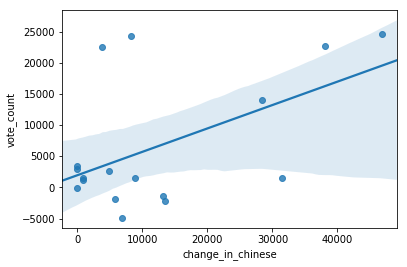

In [61]:
raceSummary('chinese')
createRaceDataFrame('chinese')

                            OLS Regression Results                            
Dep. Variable:        change_in_malay   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     9.681
Date:                Sun, 20 Jan 2019   Prob (F-statistic):            0.00672
Time:                        15:24:49   Log-Likelihood:                -161.76
No. Observations:                  17   AIC:                             325.5
Df Residuals:                      16   BIC:                             326.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.2110      0.068      3.111      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_malay
constituency,,,,,
Aljunied,GRC,WP,-2239,-0.0376,939.0
Ang Mo Kio,GRC,RP,22639,0.0931,8686.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,909.0
Bukit Panjang,SMC,SDP,1579,0.0211,2420.0
East Coast,GRC,WP,-4899,0.059,834.0
Holland-Bukit Timah,GRC,SDP,14013,0.0652,4366.0
Hong Kah North,SMC,SPP,1472,0.0415,33.0
Hougang,SMC,WP,-1823,-0.0714,313.0
Nee Soon,GRC,WP,1547,0.0843,8263.0


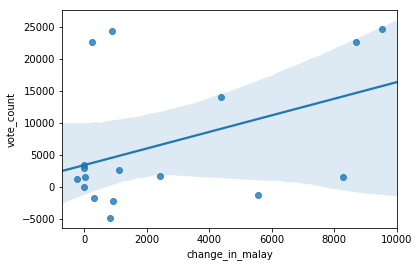

In [60]:
raceSummary('malay')
createRaceDataFrame('malay')

                            OLS Regression Results                            
Dep. Variable:       change_in_indian   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     10.43
Date:                Sun, 20 Jan 2019   Prob (F-statistic):            0.00523
Time:                        15:29:02   Log-Likelihood:                -147.22
No. Observations:                  17   AIC:                             296.4
Df Residuals:                      16   BIC:                             297.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.0932      0.029      3.230      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_indian
constituency,,,,,
Aljunied,GRC,WP,-2239,-0.0376,1698.0
Ang Mo Kio,GRC,RP,22639,0.0931,2740.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,121.0
Bukit Panjang,SMC,SDP,1579,0.0211,1484.0
East Coast,GRC,WP,-4899,0.059,1509.0
Holland-Bukit Timah,GRC,SDP,14013,0.0652,1894.0
Hong Kah North,SMC,SPP,1472,0.0415,-318.0
Hougang,SMC,WP,-1823,-0.0714,382.0
Nee Soon,GRC,WP,1547,0.0843,2527.0


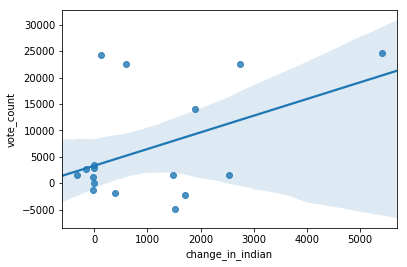

In [62]:
raceSummary('indian')
createRaceDataFrame('indian')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:        change_in_other   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     14.17
Date:                Sun, 20 Jan 2019   Prob (F-statistic):            0.00170
Time:                        15:23:22   Log-Likelihood:                -126.04
No. Observations:                  17   AIC:                             254.1
Df Residuals:                      16   BIC:                             254.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.0312      0.008      3.764      0.0

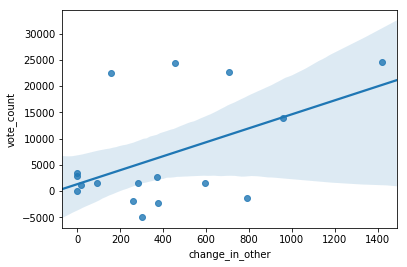

In [58]:
raceSummary('other')

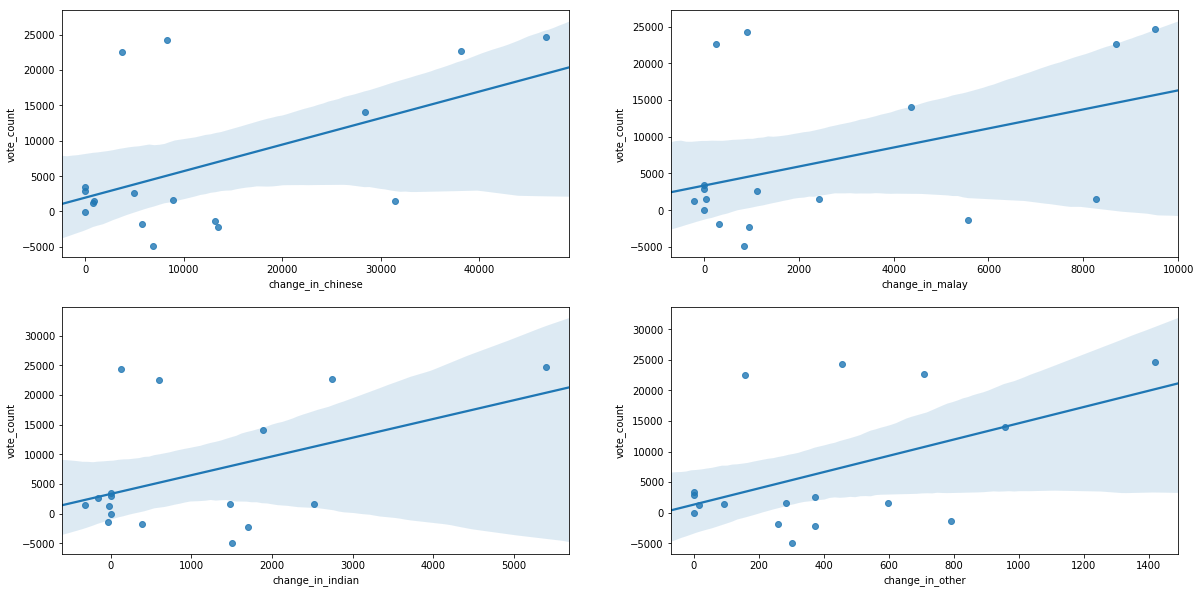

In [59]:
plt.subplots(figsize=(20,10))
a1 = plt.subplot(221)
a1 = plotRaceDataFrame('chinese')
a2 = plt.subplot(222)
a2 = plotRaceDataFrame('malay')
a3 = plt.subplot(223)
a3 = plotRaceDataFrame('indian')
a4 = plt.subplot(224)
a4 = plotRaceDataFrame('other')